# Tensor
**Opdracht**: We gebruiken de term tensor in machine learning. Een tensor is een multi-d array. Waarom is het een handige manier om een afbeelding te representeren?

## Tools

We gebruiken de volgende libraries/tools om de pipeline op te zetten:

**Tensorflow** (https://www.tensorflow.org/) is een kant en klare platform voor machine learning.

**Keras** is een Neurale Network library beschikbaar voor Python. Het maakt het ontwerpen ervan makkelijker en creert een abstractielaag.

**matplotlib.pyplot** om beelden en data te printen op het scherm. We gebruiken dit om de tussenresultaten te tonen en voor leerdoeleinden.

**numpy** om als datastructuur te gebruiken voor de data. Het is een alternatief voor de bekende ingebouwde list datastructuur. Het heeft uitgebreide support niet enkel voor 1D maar ook voor 2D, 3D en xD data.

In [2]:
import numpy as np
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras

# om output te tonen
import matplotlib.pyplot as plt
import os
import time


# Dataset binnenhalen

Om Alexnet te trainen gebruiken we een kant en klare database van images: **keras.datasets** refereert naar ingebouwde datasets, die kunnen we laden.

We gebruiken CIFAR database, zie de webpagina voor meer info: https://www.cs.toronto.edu/%7Ekriz/cifar.htmlEen .

Deze dataset bevat 50.000 32x32 (kleuren) afbeeldingen om te trainen en 10.000 on te testen. Data heeft 10 categorien.

Call naar db retourneert een Tuple van NumPy arrays: (x_train, y_train), (x_test, y_test).

# Image data

x_train en x_test representeren image data. Dat zijn pixel waardes opgesplits in grijswaardes van elk kanaal (R, G, B), dus 3 in totaal.

De vorm van de numpyarrays *x_train* en *x_test* is dus (aantal, 32, 32, 3).

# Label data

y_train en y_test representeren een numPy array met labels data. Labels zijn gerepresenteerd als een integer en lopen van *0-9*.
De vorm van de array is dus (aantal, 1)

In [3]:

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

Data is gelabeld op 10 categroieen (zie ook [Keras documentatie](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data)). Elk cijfer komt dus overheen met een categorie.

**Opdracht**: Zoek uit wat categorie is van de allerreeste element van de testset.

In [4]:
# haal de allereerste element binnen. Het is een cijfer. Zoek in de Keras documentatie op welke categorie het is.
y_train[0, 0]

6

**Opdracht**: Print nu het bijbehorende plaatje.

In [ ]:
x_train[0]

**Opdracht**: Print nu alleen het groene kanaal van het plaatje.

In [6]:
x_train[0,:,:,1]

array([[ 62,  46,  48, ..., 132, 125, 124],
       [ 20,   0,   8, ...,  88,  83,  87],
       [ 24,   7,  27, ...,  84,  84,  73],
       ...,
       [170, 153, 161, ..., 133,  31,  34],
       [139, 123, 144, ..., 148,  62,  53],
       [144, 129, 142, ..., 184, 118,  92]], dtype=uint8)

# Intern de data bijhouden.

We hebben nu veel data binnengehaald in hebben een manier nodig om het als een soort van database te kunnen gebruiken.
Daarvoor is een oplossing: we gebruiken *tf.data.Dataset* als een manier om met (veel) data te kunnen werken.
Aan *tf.data.Dataset* zit ook een API vast die pipeline opbouwen makkelijker maakt.
Het is hiermee heel makkelijk om een tensor in te laden (uit bijvoorbeeld een lijst/array).


In [9]:

dataset_train=tf.data.Dataset.from_tensor_slices((x_train,y_train))
dataset_test=tf.data.Dataset.from_tensor_slices((x_test,y_test))

Om te kijken hoe de data er uit ziet maken we een figure aan om afbeeldingen naar toe te printen. Dat kan op de volgende manier.

In [10]:
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

De arrays worden nu opgesplitst in losse Tensor objecten.

**Opdracht:** Print nu het eerste element. Hoe ziet het er uit?

In [ ]:
for x in dataset_train.take(1):
    print(x)

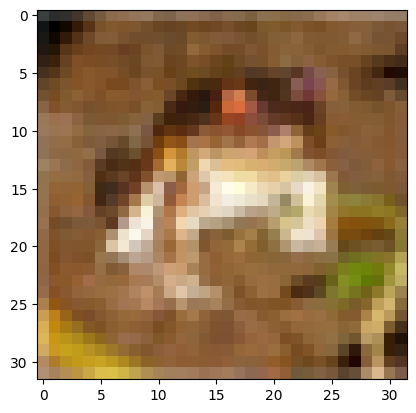

In [15]:
for image, label in dataset_train.take(1):
    plt.imshow(image)

Om in plaats van getallen de "echte" class namen bij te houden kunnen we een array aanmaken.

In [ ]:
class_names= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

We willen nu images op het scherm kunnen toenen. Eerst maken we een figure aan waarinde afbeeldingen gedisplayed worden.


In [ ]:
plt.figure(figsize=(10, 10))


<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

**Opdracht**: Schrijf een stukje code gebruikmakend van *plt.subplot* om de eerste 6 afbeeldingen van de *dataset_train* te tonen in de figuur die we hierboven hebben aangemaakt.

In [1]:



'''
plt.subplot

Uit matlab documentatie: Three integers (nrows, ncols, index).
The subplot will take the index position on a grid with nrows rows and ncols columns.
index starts at 1 in the upper left corner and increases to the right.
'''

i = 0
#show 6 images from dataset
for image, label in dataset_train.take(6):
    ax = plt.subplot(2, 3, i+ 1)
    plt.imshow(image)
    plt.title(class_names[label[0]])
    i = i+1
    plt.axis("off")


NameError: name 'dataset_train' is not defined

# Image representatie standaardiseren

Het is mooi dat we de images binnen
Elke image in de dataset moet op dezelfde manier worden veoorbereid om vergeleken te worden.

Hoe kunnen we de afbeeldingen standaardiseren?

Zo willen we de waardes niet niet als integers van 0 tot 255 hebben, maar als float en 0 als mean. Om dit te bereiken heeft keras **per_image_standardization** functie:
*Linearly scales each image in image to have mean 0 and variance 1.*

Een andere belangerijke voorwaarde is dat alle images even groot zijn qua afmetingen. Daarom doen we de **resize** functie met bijv 64 bij 64

In [ ]:
#preprocess an image - bring to standart format

def process_image(image,label):
    image=tf.image.per_image_standardization(image)
    image=tf.image.resize(image,(64,64))

    return image,label
















Data Pipeline

In [ ]:
#print size of training/test set
#Returns the cardinality of dataset, if known.
# zoek op wat cardiality is
'''
Cardinality’s official, non-database dictionary definition is mathematical: the number of values in a set.
 When applied to databases, the meaning is a bit different:
 it’s the number of distinct values in a table column relative to the number of rows in the table.
 Repeated values in the column don’t count.
'''
train_ds_size=tf.data.experimental.cardinality(dataset_train).numpy()
#.numpy: .numpy() converts a tensor object into an numpy.ndarray object
test_ds_size=tf.data.experimental.cardinality(dataset_test).numpy()
print('Train size:',train_ds_size)
print('Test size:',test_ds_size)

Train size: 50000
Test size: 10000


1. Preprocessing the data within the dataset

2. Shuffle the dataset
3. Batch data within the dataset



In [ ]:
train_ds=(train_ds
          .map(process_image)
          .shuffle(buffer_size=train_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )
test_ds=(test_ds
          .map(process_image)
          .shuffle(buffer_size=test_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )




Model Implementation¶

Within this section, we will implement the AlexNet CNN architecture from scratch. Through the utilization of Keras Sequential API, we can implement consecutive neural network layers within our models that are stacked against each other.

Here are the types of layers the AlexNet CNN architecture is composed of, along with a brief description:
Convolutional layer:

A convolution is a mathematical term that describes a dot product multiplication between two sets of elements. Within deep learning the convolution operation acts on the filters/kernels and image data array within the convolutional layer. Therefore a convolutional layer is simply a layer the houses the convolution operation that occurs between the filters and the images passed through a convolutional neural network.
Batch Normalisation layer:

Batch Normalization is a technique that mitigates the effect of unstable gradients within a neural network through the introduction of an additional layer that performs operations on the inputs from the previous layer. The operations standardize and normalize the input values, after that the input values are transformed through scaling and shifting operations.
MaxPooling layer:

Max pooling is a variant of sub-sampling where the maximum pixel value of pixels that fall within the receptive field of a unit within a sub-sampling layer is taken as the output. The max-pooling operation below has a window of 2x2 and slides across the input data, outputting an average of the pixels within the receptive field of the kernel.
Flatten layer:

Takes an input shape and flattens the input image data into a one-dimensional array.
Dense Layer:

A dense layer has an embedded number of arbitrary units/neurons within. Each neuron is a perceptron.

The code snippet represents the Keras implementation of the AlexNet CNN architecture.


In [ ]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax')


])


Training and Results¶

To train the network, we have to compile it.

The compilation processes involve specifying the following items:
Loss function:

A method that quantifies ‘how well’ a machine learning model performs. The quantification is an output(cost) based on a set of inputs, which are referred to as parameter values. The parameter values are used to estimate a prediction, and the ‘loss’ is the difference between the predictions and the actual values.
Optimization Algorithm:

An optimizer within a neural network is an algorithmic implementation that facilitates the process of gradient descent within a neural network by minimizing the loss values provided via the loss function. To reduce the loss, it is paramount the values of the weights within the network are selected appropriately.
Learning Rate:

An integral component of a neural network implementation detail as it’s a factor value that determines the level of updates that are made to the values of the weights of the network. Learning rate is a type of hyperparameter.

We can also provide a summary of the network to have more insight into the layer composition of the network by running the model.summary() function.


In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 128)       46592     
                                                                 
 batch_normalization (Batch  (None, 14, 14, 128)       512       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 7, 7, 128)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 batch_normalization_1 (Bat  (None, 7, 7, 256)         1024      
 chNormalization)                                                
                                                        



At this point, we are ready to train the network.

Training the custom AlexNet network is very simple with the Keras module enabled through TensorFlow. We simply have to call the fit() method and pass relevant arguments.

Epoch: This is a numeric value that indicates the number of time a network has been exposed to all the data points within a training dataset.


In [ ]:
history=model.fit(
    train_ds,
    epochs=50,
    validation_data=test_ds,
    validation_freq=1
)

Epoch 1/50
1562/1562 [==============================] - 512s 323ms/step - loss: 2.1312 - accuracy: 0.2525 - val_loss: 1.6086 - val_accuracy: 0.4248
Epoch 2/50
1562/1562 [==============================] - 506s 320ms/step - loss: 1.7087 - accuracy: 0.3836 - val_loss: 1.4354 - val_accuracy: 0.4823
Epoch 3/50
1562/1562 [==============================] - 507s 322ms/step - loss: 1.5370 - accuracy: 0.4479 - val_loss: 1.3296 - val_accuracy: 0.5213
Epoch 4/50
1562/1562 [==============================] - 512s 324ms/step - loss: 1.4170 - accuracy: 0.4921 - val_loss: 1.2607 - val_accuracy: 0.5504
Epoch 5/50
1562/1562 [==============================] - 516s 326ms/step - loss: 1.3119 - accuracy: 0.5340 - val_loss: 1.1921 - val_accuracy: 0.5756
Epoch 6/50
1562/1562 [==============================] - 511s 324ms/step - loss: 1.2285 - accuracy: 0.5643 - val_loss: 1.1273 - val_accuracy: 0.6018
Epoch 7/50
1562/1562 [==============================] - 511s 324ms/step - loss: 1.1543 - accuracy: 0.5924 - val_

KeyboardInterrupt: 

In [ ]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

ow we will visualize the training over the different epochs .

NameError: name 'history' is not defined

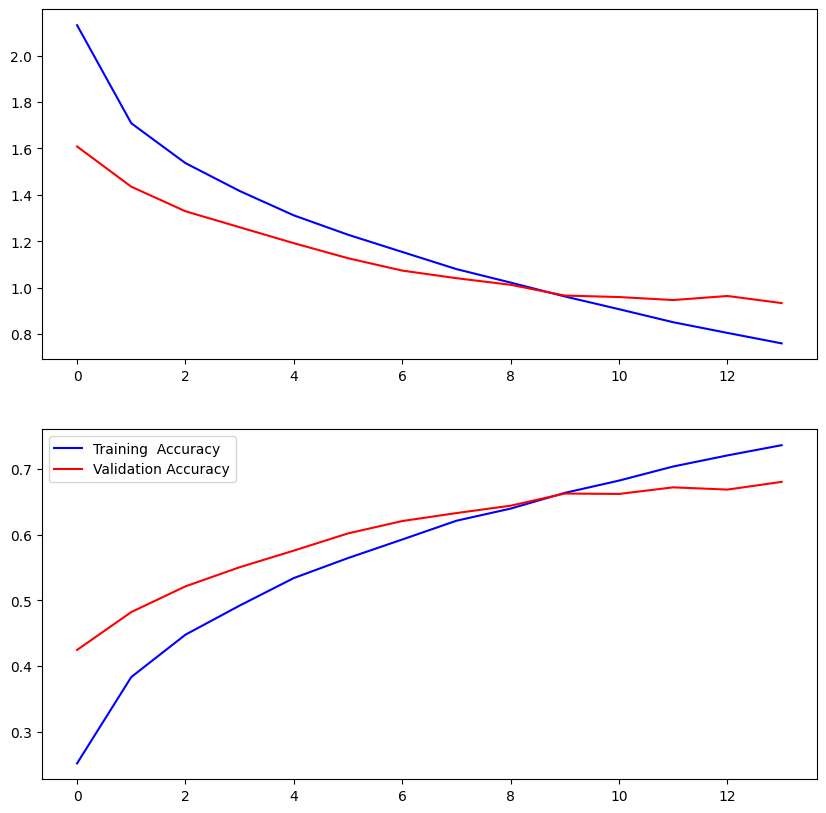

In [ ]:
f,ax=plt.subplots(2,1,figsize=(10,10))

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(model.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model.history.history['val_loss'],color='r',label='Validation Loss')

#Plotting the training accuracy and validation accuracy
ax[1].plot(model.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(model.history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

print('Accuracy Score = ',np.max(history.history['val_accuracy']))